# Python Graphics

In this lecture we will present how to make plots using the *pylab* python package.  Pylab is python's version of Matlab's plotting features, and it makes really nice plots that are good enough for journal articles, as well as 3D graphics and animations.  We will go over many features today.

Note that there is not a companion set of slides to go with this notebook.  It's really cumbersome to make plots and then place them onto slides.

## Loading Pylab

Like any package, pylab must be loaded before use.  You can load the full package, but we will instead load individual functions.  Here we load two functions we will introduce in the next section, **plot** and **show**.

In [2]:
from pylab import plot

## Line Plots

Here we introduce *line plots*; *Newman* calls them *graphs*. These are the simplest plots to make and are ubiquitous in the literature.  Use these to plot 1D mathematical functions or any situation where it makes since to draw a line between some points (not for data with scatter or histograms).

We use the **plot** function to make these plots.  Here is an example.

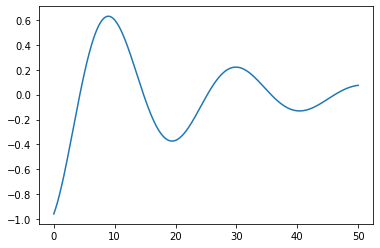

In [19]:
# load numpy
import numpy as np

# we plot e^(-0.05x)*sin(0.3x+5)
x = np.linspace(0.,50.,num=501) # build grid of x-values
y = np.exp(-0.05*x)*np.sin(0.3*x+5)

plot(x,y)

*Newman* also introduces the function **show()** for seeing the plot.  This is only necessary if you're running python from the terminal. It is not necessary in Jupyter.

If you want to save the plot to a file you can use the **savefig** function to save it to a graphics file.  The function only takes one argument -- the filename.  To get your preferred format, just use the relevent file extension in the filename and pylab will automatically save it in your preferred format.  I have not tested all the graphics file formats that exist, but savefig can make PDFs (.pdf), JPEGs (.jpg), PNGs (.png), and EPS files (.eps).

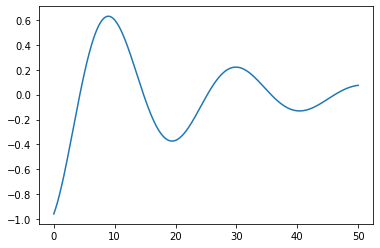

In [20]:
# save as a JPEG file
from pylab import savefig
plot(x,y) # must appear in same cell for Jupyter
savefig('wave.jpg')

You can also switch the color of the plot using the *color* option.

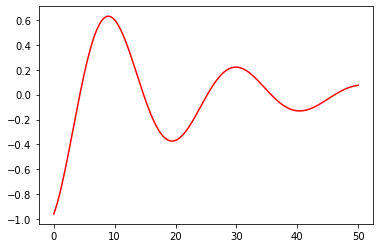

In [21]:
# make a red plot
plot(x,y,color='red')

Or a green plot.

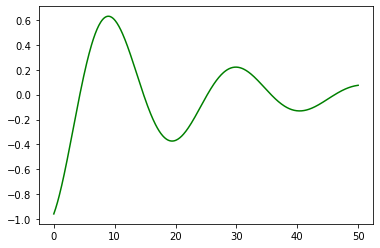

In [22]:
plot(x,y, color='green')

You can also change the line from a solid line to a other styles using the *linestyle* option.

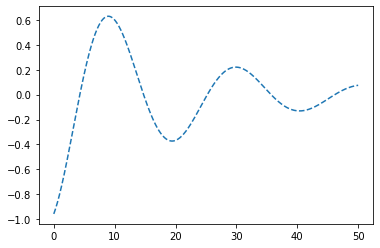

In [23]:
# dashed line
plot(x,y,linestyle='--')

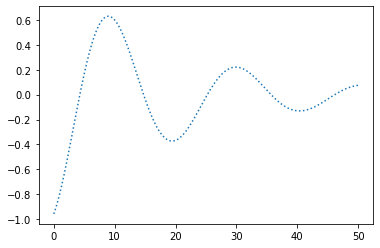

In [25]:
plot(x,y,linestyle=':')

Having different linestyles is great when you want to put multiple lines on one plot for comparison, which I will do now.  It just requires using the **plot** function multiple times.

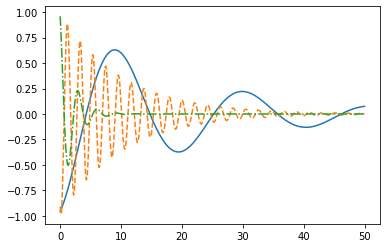

In [27]:
plot(x,y)

y2=np.exp(-0.1*x)*np.sin(3*x-2)
plot(x,y2,linestyle='--')

y3=np.exp(-0.5*x)*np.cos(2*x-6)
plot(x,y3,linestyle='-.')# dash-dot line

Note that pylab automatically give the curves different colors, though you can always define the color of each curve.

Be mindful that these lines look like "curves" only because we used enough points such that our eyes cannot tell they are really just connected lines.  If we use fewer points, then it is more obvious.

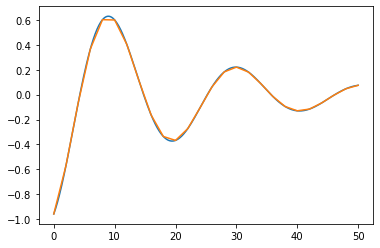

In [30]:
plot(x,y)

x4 = np.linspace(0.,50.,num=26)
y4 = np.exp(-0.05*x4)*np.sin(0.3*x4+5)

plot(x4,y4)

One thing we are missing so far is that we don't know what we are plotting.  All plots should have axis labels (call me out if I forget).  You can use **xlabel** and **ylabel** to set the axis labels.

Text(0, 0.5, 'f(x)')

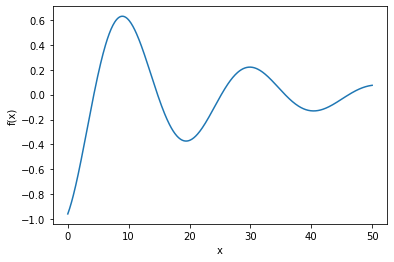

In [33]:
from pylab import xlabel,ylabel
plot(x,y)
xlabel('x')
ylabel('f(x)')

You can also change the x- and y-axis limits using **xlim** and **ylim**.

(-0.6, 0.9)

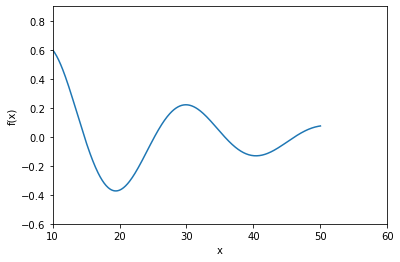

In [34]:
from pylab import xlim,ylim
plot(x,y)
xlabel('x')
ylabel('f(x)')
xlim([10,60]) # args - min and max values for axis
ylim([-0.6,0.9])

An important tool to use whenever plotting more than one curve is a legend.  For pylab, this can be done using the **legend** function.

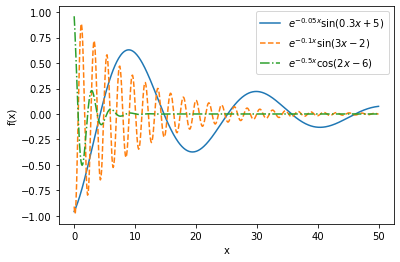

In [40]:
from pylab import legend
plot(x,y,label='$e^{-0.05x}\sin(0.3x+5)$') # label option sets
# the label that appears in the legend

y2=np.exp(-0.1*x)*np.sin(3*x-2)
plot(x,y2,linestyle='--',label='$e^{-0.1x}\sin(3x-2)$')

y3=np.exp(-0.5*x)*np.cos(2*x-6)
plot(x,y3,linestyle='-.',label='$e^{-0.5x}\cos(2x-6)$')
xlabel('x')
ylabel('f(x)')
legend()

Note the '$' symbols that appear in the plot labels.  These symbols mark that the text between them are written in the LaTex language.  You will use this language to write your final reports.  It is very useful for writing equations and Greek letters.

## Scatter Plots

Sometimes it is better to not connect the points that you are plotting with lines, in which case **scatter plots** are better to use.  This could be because you are plotting binned data or simulated results at discrete x-values and you do not want to imply that you do not know the function between the discrete values.  This could particularly be the case if you have uncertainties in your binned data.  Also, scatter plots are useful when you are plotting data where there is a lot of scatter from a one-to-one y(x) relation, either due to statistical measurement uncertainties or hidden variables.

To make a scatter plot, you can use the same **plot** function as before, but with an option that gives the *marker* for the points.

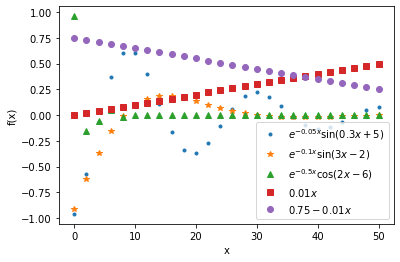

In [50]:
plot(x4,y4,'.',label='$e^{-0.05x}\sin(0.3x+5)$') # circles

y5=np.exp(-0.1*x4)*np.sin(3*x4-2)
plot(x4,y5,'*',label='$e^{-0.1x}\sin(3x-2)$') # stars

y6=np.exp(-0.5*x4)*np.cos(2*x4-6)
plot(x4,y6,'^',label='$e^{-0.5x}\cos(2x-6)$')# triangles

plot(x4,0.01*x4,'s',label='$0.01x$')# squares
plot(x4,0.75-0.01*x4,'o',label='$0.75-0.01x$')# big circles
xlabel('x')
ylabel('f(x)')
legend()

Here is an example where we plot randomly-sampled points from a 2D normal distribution.

(-6.0, 6.0)

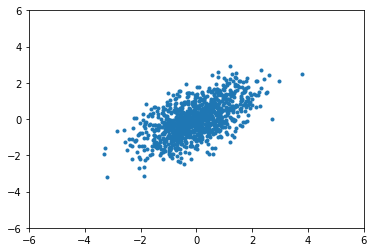

In [67]:
r=0.6 #cross-correlation coefficient
x = np.random.multivariate_normal([0.,0.],[[1.,r],[r,1.]],1000) #(mean, cov matrix, num of samples)
plot(x[:,0],x[:,1],'.')
xlim([-6,6])
ylim([-6,6])

In [58]:
x

array([[ 1.62668746, -0.68624991],
       [ 1.63312622,  0.22973433],
       [ 0.29125541, -1.81188252],
       ...,
       [-2.05048382,  0.19756772],
       [-0.20763815, -2.35066693],
       [-1.9913067 , -1.22055058]])

## Density Plots

Now lets consider plots of 2D functions.  These could be maps of mass or charge density on a surface, heat maps, or many other functions.

We can plot these using the **imshow** function.  Unfortunately it is not the most ideal function, so let us consider some examples to see how best to use it.

We're going to plot the function $f(x,y)=(4x^2+y^2)^2-5(4x^2+y^2)+4$.  The cross section of this function looks like an ellipse, which is plotted below for $4x^2+y^2=4$, or $f(x,y)=0$.

(-2.0, 2.0)

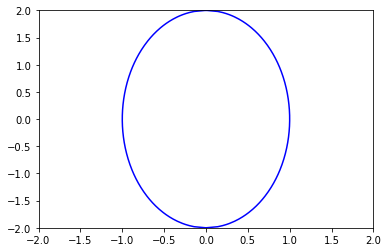

In [71]:
a = 2.
y=np.linspace(-a,a,100*int(a))
x1=np.sqrt(1-(y/a)**2)
x2=np.zeros(len(x1))
x2[:]=-x1[:]
plot(x1,y,color='blue')
plot(x2,y,color='blue')
xlim([-a,a])
ylim([-a,a])

First we need to compute the function into an array.  Let's do the naive thing and assume that $x$ should span the first index of the array and $y$ span the second.  We will use a nested for loop to populate the array.

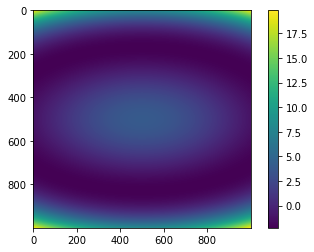

In [97]:
from pylab import imshow,colorbar
x=np.linspace(-1.2,1.2,1000)
y=np.linspace(-1.2,1.2,1000)
n=len(x)
f=np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        r2=4*x[i]**2+y[j]**2
        f[i,j]=r2**2-5*r2+4

imshow(f) # makes plot
colorbar() # includes color bar for f values

Note that we have a color bar from the function **colorbar()**.  We have many options to change the color scheme.  Here's one example.

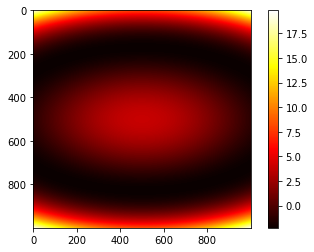

In [102]:
from pylab import hot
imshow(f,)
hot()
colorbar()

Here you see the while the cross-section of $f(x,y)$ was elongated along the y-axis, the ellipses in the density plot are along the x-axis. Why?  Because the matrix indices' relation to (x,y) should be reversed.  **imshow** just plots a matrix like you would write it on paper -- the first index corresponds to the rows from top to bottom, while the second index corresponds to the columns from left to right.  So it's the *second* index that should go with $x$, and the *first* index should go with $y$.  We can easily fix this by plotting the transpose of the matrix, or **f.T**.

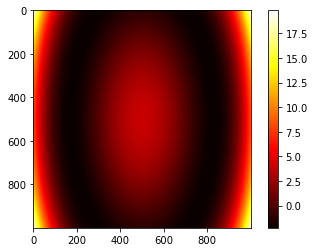

In [103]:
f=np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        r2=4*x[i]**2+y[j]**2
        f[i,j]=r2**2-5*r2+4

imshow(f.T)
colorbar()

It looks like things are fixed now, but not quite.  Now, let's plot just one corner of the matrix, or only positive values of $x$ and $y$.

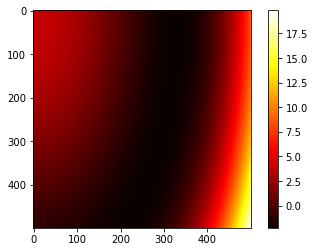

In [104]:
x=np.linspace(0.,1.2,500)
y=np.linspace(0.,1.2,500)
n=len(x)
f=np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        r2=4*x[i]**2+y[j]**2
        f[i,j]=r2**2-5*r2+4

imshow(f.T)
colorbar()

As you can see, it appears that the center of the ellipsoidal cross-section appears at the top-left corner, rather than the expected bottom-left corner.  Luckily, **imshow** provides an option to fix this -- just set **origin='lower'**.

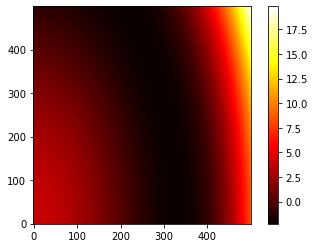

In [105]:
imshow(f.T,origin='lower')
colorbar()

To show x,y values along the axis, use the **extent** option, which appears as **extent=[x left, x right, y bottom, y top]**.

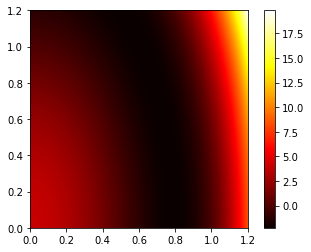

In [106]:
imshow(f.T,origin='lower',extent=[0,1.2,0,1.2])
colorbar()

Of course, the **extent** option is purely cosmetic and only affects the ticklabels.  The density color map is only affected by the array values, not the values in **extent**.  You should also put labels!

Text(0, 0.5, 'y')

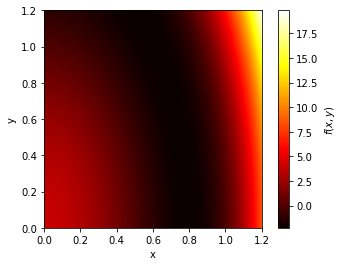

In [107]:
imshow(f.T,origin='lower',extent=[0,1.2,0,1.2])
colorbar(label='$f(x,y)$') # function label
xlabel('x') # axes labels
ylabel('y')

We could also superimpose contours using the **plot** function.

Text(0, 0.5, 'y')

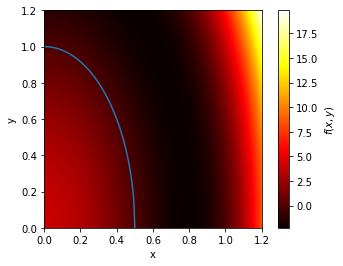

In [108]:
x=np.linspace(0.,0.5,100)
y=np.sqrt(1.-4*x**2)

imshow(f.T,origin='lower',extent=[0,1.2,0,1.2])
plot(x,y)
colorbar(label='$f(x,y)$')
xlabel('x')
ylabel('y')

## 2D & 3D graphics

Python also allows you to plot 2D objects, like polygons and circles, as well as 3D objects, including spheres, boxes, cones, and cylinders.

### 2D graphics

First let's start with some 2D objects.  We will use the *matplotlib* package to get these shapes.  Note that pylab is actually part of the larger matplotlib package.  The different shapes are called *patches*.  Also, unlike plots from before where the axes were generated from the data, we have to declare axes along with boundaries to which we will add patches (shapes).

First, we will draw various rectangles using the **Rectangle** patch.  The syntax is **Rectangle((x,y),width, height, angle)** where $(x,y)$ is the coordinate of the lower left corner and *angle* is the rotation angle (in degrees) from the x-axis.  Note that the first 3 parameters are the pre-rotated values.

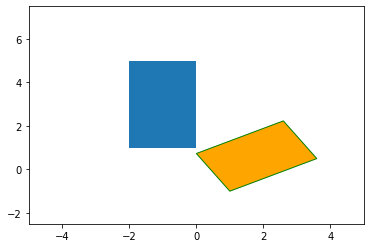

In [21]:
from matplotlib.patches import Rectangle # get rectangle patch
from pylab import subplots # get function for producing axes

# Here are 2 rectangles
rect1 = Rectangle((-2.,1.),2.,4.)
rect2 = Rectangle((1.,-1.),3.,2.,30.,edgecolor='green',facecolor='orange')

#declare figure and axes
fig,ax=subplots(1)
#set boundaries
ax.set_xlim([-5.,5.])
ax.set_ylim([-2.5,7.5])
#add rectangles
ax.add_patch(rect1)
ax.add_patch(rect2)


Note that blue is the default color, but you can change the inside and border of the rectangles.

You can also draw some more general polygons using the **Polygon** patch, where you just give all the corners of the polygon in a Nx2 array, where N is the number of vertices. Here are some examples.

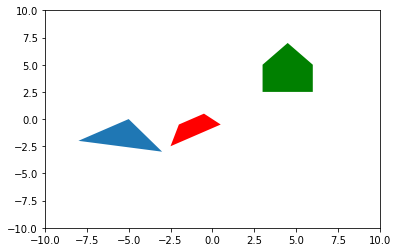

In [22]:
from matplotlib.patches import Polygon

# triangle
tri=Polygon([[-8.,-2.],[-5.,0.],[-3.,-3.]])
# trapezoid
trap=Polygon([[-2.5,-2.5],[0.5,-0.5],[-0.5,0.5],[-2.,-0.5]],facecolor='red')
# pentagon
pent=Polygon([[3.,2.5],[6.,2.5],[6.,5.],[4.5,7.],[3.,5.]],facecolor='green')
#declare figure and axes
fig,ax=subplots(1)
#set boundaries
ax.set_xlim([-10.,10.])
ax.set_ylim([-10.,10.])
#add patches
ax.add_patch(tri)
ax.add_patch(trap)
ax.add_patch(pent)

Circles and ellipses are drawn using the **Circle** and **Ellipse** patches, where circles just need a center and radius, while ellipses need a center, width, height, and angle.

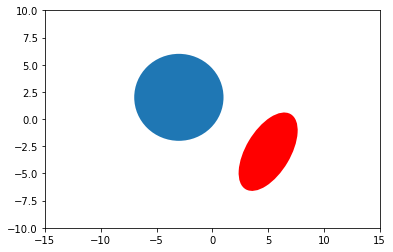

In [23]:
from matplotlib.patches import Circle, Ellipse

# circle
circ=Circle([-3.,2.],4.)
# ellipse
ell=Ellipse([5.,-3.],8.,4.,60.,facecolor='red')
#declare figure and axes
fig,ax=subplots(1)
#set boundaries
ax.set_xlim([-15.,15.])
ax.set_ylim([-10.,10.])
#add patches
ax.add_patch(circ)
ax.add_patch(ell)

Note that I changed the x-axis limits make the aspect ratio 1:1.  By default the aspect ratio is 2:1, which would have made circle look like an ellipse.

The full list of different patches are given here https://matplotlib.org/3.3.1/api/patches_api.html.

### 3D graphics

Now we introduce 3D graphics, which are provided through the *VPython* package https://vpython.org/ (the visual package cited in *Newman* is out of date).  These will be very useful if you want to make cool simulations.

VPython does not automatically come with anaconda.  To install it run at the terminal either "conda install -c vpython vpython" or "pip install vpython". 

First we construct a sphere using the **sphere** function.  Note that sometimes it is necessary to restart the kernel to get the graphic to appear.

In [1]:
from vpython import *

scene=canvas(width=200,height=200)

sphere()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Note that you can zoom the image by dragging in the graphic box.  Now let's draw 2 spheres with different positions and attributes.

In [12]:
scene=canvas(width=200,height=200)

sphere(pos=vector(5,-5,2),radius=1.,color=color.green)
sphere(pos=vector(-8,6,7),radius=3.,color=color.blue)

<IPython.core.display.Javascript object>

The options in **sphere()** are obvious except for *pos*, the position of the sphere's center.  Note that *pos* is set to a **vector**, an object specific the VPython that is assigned as a tuple.  Note the difference from the *visual* package where *pos* is set directly to a list.

The region on which the 3D objects are drawn is called a *canvas*, which is declared using the function **canvas()**.  In a notebook you need to declare a new canvas for each figure.  Note that the default size for the canvas to too large for the notebook, so we set the size manually.

*Newman* gives an example of how to define a lattice of spheres.  To make a lot of rings of spheres stacked like a cylinder, you could run the following script.

In [18]:
import numpy as np
scene=canvas(width=200,height=200)

Ns=12 # number of spheres per ring
Nr=5 # number of rings
r=1. # radius of spheres
R=5. # radius of ring of spheres
dz=5*r #spacing between rings
theta=2*np.pi*np.arange(Ns)/Ns# angle for each sphere
x=R*np.cos(theta) #angle -> (x,y)
y=R*np.sin(theta)
z=-dz*np.arange(Nr) # ring positions
for i in np.arange(Nr):
    for j in np.arange(Ns):
        sphere(pos=vector(x[j],y[j],z[i]),radius=r,color=color.red)

<IPython.core.display.Javascript object>

Note that you can also draw other shapes, including boxes, cones, and arrows, just like in *visual* shown in the book.  You can also change the camera direction through the option *forward* in **canvas**; the default is looking down along the z direction.  Try it.

In [23]:
import numpy as np
scene=canvas(width=200,height=200,forward=vector(0,1,0))
#looking right along the y direction

Ns=12 
Nr=5 
r=1. 
R=5. 
dz=5*r 
theta=2*np.pi*np.arange(Ns)/Ns
x=R*np.cos(theta) 
y=R*np.sin(theta)
z=-dz*np.arange(Nr) 
for i in np.arange(Nr):
    for j in np.arange(Ns):
        arrow(pos=vector(x[j],y[j],z[i]),axis=vector(1,3,-2),color=color.red)

<IPython.core.display.Javascript object>

## Animation

The *VPython* package also allows for animations of 3D objects.  In physics we often use these animations to help understand physical systems.

The key is that for any attribute of an object (position, size, color), you can change it after it has been declared.  For example, you can declare a sphere

In [26]:
scene=canvas(width=200,height=200)

ball=sphere(color=color.green)

<IPython.core.display.Javascript object>

and then change the color as so (look above).

In [27]:
ball.color=color.blue

These changes happen two fast to see a proper animation, so you have to use the function **rate(u)** to set *u*, the number of frames per second.  Note that **rate()** goes inside a for loop.

In [29]:
import numpy as np
scene=canvas(width=200,height=200)
x=-10.
y=-10.
dx=0.1
dy=0.1
ball=sphere(pos=vector(x,y,0),radius=1.,color=color.green)
for i in np.arange(200):
    rate(30)
    x+=dx
    y+=dy
    ball.pos=vector(x,y,0)

<IPython.core.display.Javascript object>

Now let us consider an extremely simple simulation.  Consider two balls of equal mass on a billiard table that go towards each other at a right angle but do not interact.  It would look like so. 

In [30]:
import numpy as np
scene=canvas(width=200,height=200)
x1=-10.
y1=-10.
x2=-10.
y2=10.
dx1=0.1
dy1=0.1
dx2=0.1
dy2=-0.1
ball1=sphere(pos=vector(x1,y1,0),radius=1.,color=color.green)
ball2=sphere(pos=vector(x2,y2,0),radius=1.,color=color.blue)
for i in np.arange(200):
    rate(30)
    x1+=dx1
    y1+=dy1
    x2+=dx2
    y2+=dy2
    ball1.pos=vector(x1,y1,0)
    ball2.pos=vector(x2,y2,0)

<IPython.core.display.Javascript object>

Of course, without interactions we would not have physics.  If the two balls collide and the first ball leaves at a 45$^\circ$ angle, then we know due to conservations laws that the speeds of the balls do not change but they exchange y-directions.  We can assume the exchange happens when the balls touch.  This could be animated with the following script.

In [2]:
import numpy as np
scene=canvas(width=200,height=200)
x1=-10.
y1=-10.
x2=-10.
y2=10.
dx1=0.1
dy1=0.1
dx2=0.1
dy2=-0.1
ball1=sphere(pos=vector(x1,y1,0),radius=1.,color=color.green)
ball2=sphere(pos=vector(x2,y2,0),radius=1.,color=color.blue)
for i in np.arange(200):
    rate(30)
    x1+=dx1
    y1+=dy1
    x2+=dx2
    y2+=dy2
    ball1.pos=vector(x1,y1,0)
    ball2.pos=vector(x2,y2,0)
    if abs(y2-y1)<=2.: # collision time
        dy1*=-1.
        dy2*=-1.
        

<IPython.core.display.Javascript object>

This is extremely simple, but you can see how to make this more general.  And that's your homework!